[View in Colaboratory](https://colab.research.google.com/github/J-Fo-S/models/blob/master/TF_Hub_generative_image_module_mod00_lite.ipynb)

##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# TF-Hub generative image model

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf_hub_generative_image_module.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/tf_hub_generative_image_module.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


This Colab demonstrates use of a TF-Hub module based on a generative adversarial network (GAN). 

## Optional prerequisites

* Familiarity with [low level Tensorflow concepts](https://www.tensorflow.org/programmers_guide/low_level_intro).
* [Generative Adversarial Network](https://en.wikipedia.org/wiki/Generative_adversarial_network) on Wikipedia.
* Paper on Progressive GANs: [Progressive Growing of GANs for Improved Quality, Stability, and Variation](https://arxiv.org/abs/1710.10196).

In [0]:
# Install the latest Tensorflow version.
!pip -q install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip -q install tensorflow-hub
# Install imageio for creating animations.  
!pip -q install imageio
!pip -q install scikit-image

In [0]:
#@title Imports and function definitions

import imageio
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import time

try:
  from google.colab import files
except ImportError:
  pass

from IPython import display
from skimage import transform

# We could retrieve this value from module.get_input_shapes() if we didn't know
# beforehand which module we will be using.
latent_dim = 512

graph = tf.Graph()
config = tf.ConfigProto(device_count = {'GPU': 0})
config.gpu_options.allow_growth = True


# Display multiple images in the same figure.
def display_images(images, captions=None):
  num_horizontally = 4
  f, axes = plt.subplots(
      len(images) // num_horizontally, num_horizontally, figsize=(20, 20))
  for i in range(len(images)):
    axes[i // num_horizontally, i % num_horizontally].axis("off")
    if captions is not None:
      axes[i // num_horizontally, i % num_horizontally].text(0, -3, captions[i])
    axes[i // num_horizontally, i % num_horizontally].imshow(images[i])
  f.tight_layout()

tf.logging.set_verbosity(tf.logging.ERROR)

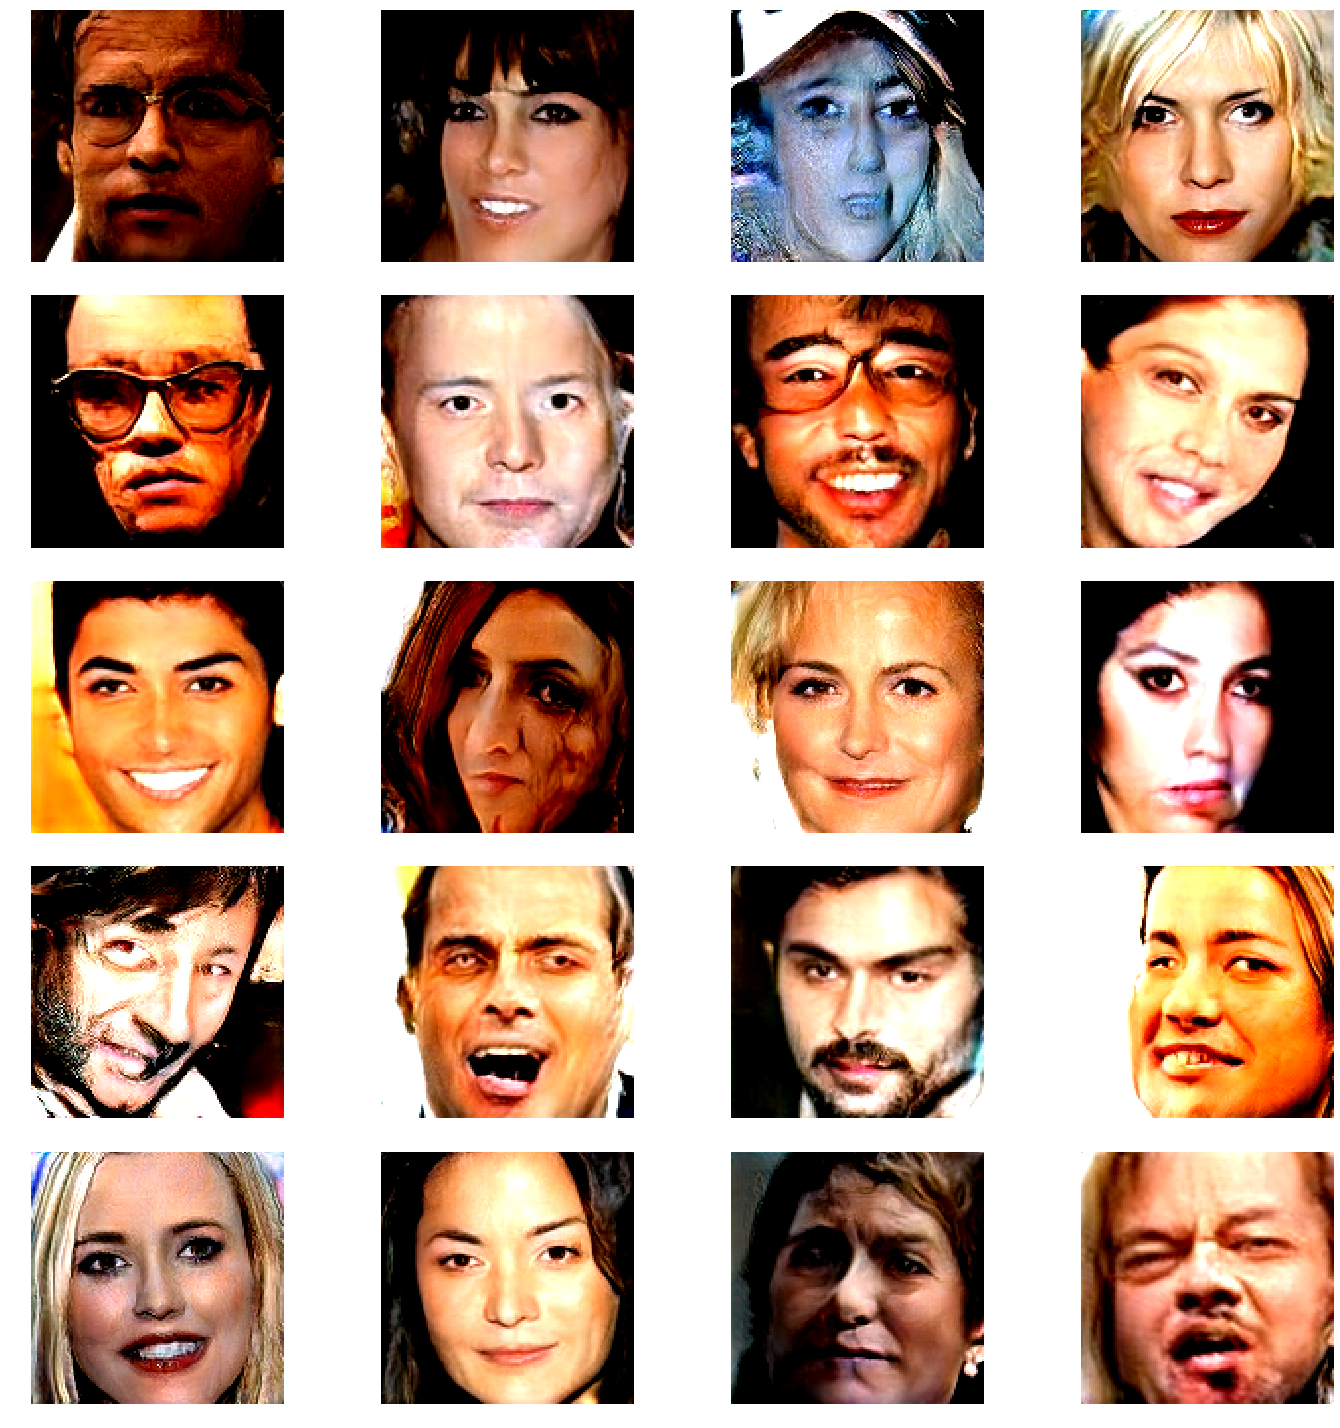

In [4]:
# display 20 random visualizations from latent space
# try different mean and dev for random vals
def get_multi_mod_images(imgs):
  images = []
  with graph.as_default():
      module = hub.Module("https://tfhub.dev/google/progan-128/1")

      with tf.Session(graph=graph, config=config) as session:
        #initial_vector = tf.random_normal([1, latent_dim], seed=np.random.randint(100))
        #initial_vector = tf.placeholder(name='rand', shape=[1, latent_dim], dtype=tf.float32)
        vector = tf.get_variable("vector_b", shape=[1, latent_dim])
        session.run(tf.global_variables_initializer())
        for _ in range(imgs):
          image = module(vector)
          im_out = session.run(image,
                              feed_dict={
                                  vector: np.random.normal(loc =0, scale =0.5, size=(1, latent_dim)) 
                              })
          images.append(im_out[0])
  return images
      
multi_images = get_multi_mod_images(20)
display_images(multi_images)